## Byte Pair Encoding

## Implemetation

1. Initialization : The BPE class is initialized with number of merges. It also initializes one empty dictionary for BPE codes, a list for vocbulary and a set for the corpus.
2. Text Preprocessing and cleaning : The preprocess method 'preprocesses' the input text, converting text to lower case, removing any punctuations and handling new lines.
3. Building BPE Codes : 'build_bpe' method processes the input text to build the BPE codes. It splits the text into words, then further into characters, creating an initial vocabulary with frequencies of each word. 
4. Get Statistics : The 'get_stats' method calculates the frequency of adjacent character pairs in the vocabulary.
5. Merge Vocabulary : The 'merge_vocabulary' method merges the most frequent pair and updates the vocabulary. 
6. Encoding Text : The 'encode' method encodes the input text using the learned BPE merges. It also splits each word into characters and merges them based on the learned BPE codes. The process continues until no more pairs can be merged as per BPE codes.

In [3]:
# Importing the libraries
import string
import matplotlib.pyplot as plt

# BPE Class
class BPE:
    # Initialize BPE with the number of merges, vocab and corpus
    def __init__(self, num_merges):
        self.num_merges = num_merges
        self.bpe_codes = {}
        self.vocab = []
        self.vocab_size_history = []
        self.corpus = set()

    # Calculate frequencies of adjacent pairs in the vocabulary
    def get_stats(self, vocabulary):
        pairs = {}
        for word, freq in vocabulary.items():
            symbols = word.split()
            for i in range(len(symbols)-1):
                pair = (symbols[i], symbols[i+1])
                if pair in pairs:
                    pairs[pair] += freq
                else:
                    pairs[pair] = freq
        return pairs

    # Merge the most frequent pair in the vocabulary
    def merge_vocabulary(self, pair, v_in):
        v_out = {}
        bigram = ' '.join(pair)
        replacement = ''.join(pair)
        if bigram != replacement:
             self.vocab_size_history.append( self.vocab_size_history[-1] + 1)
        for word in v_in:
            w_out = word.replace(bigram, replacement)
            v_out[w_out] = v_in[word]
        return v_out

    # Cleaning and preprocessing the text
    def preprocess(self, text):
        text = text.lower()
        for i in string.punctuation:
            if i == ".":
                text = text.replace(i, " ")
            else:
                text = text.replace(i, "")
        text = text.replace("\n", " ")
        return text

    # Build BPE codes from the input text
    def build_bpe(self, text):
        vocabulary = {}
        text = self.preprocess(text)
        for word in text.split(' '):
            word = ' '.join(list(word))
            if word in vocabulary:
                vocabulary[word] += 1
            else:
                vocabulary[word] = 1
        uniqu = set()
        for x in text:
            uniqu.add(x)
        self.vocab_size_history.append(len(uniqu))
        
        for i in range(self.num_merges):
            pairs = self.get_stats(vocabulary)
            if not pairs:
                break
            best = max(pairs, key=pairs.get)
            vocabulary = self.merge_vocabulary(best, vocabulary)
            self.bpe_codes[best] = i
            
        for key, val in vocabulary.items():
            self.vocab.append(key)
        self.vocab.sort(reverse = True, key = len)
        self.corpus = set(self.vocab)

    # Encode the text using the learned BPE codes
    def encode(self, text):
        encoded_text = [' '.join(list(word)) for word in text.split()]
        toReturn = []
        for i, word in enumerate(encoded_text):
            for pair in self.bpe_codes:
                pattern = ' '.join(pair)
                while pattern in word:
                    word = word.replace(pattern, ''.join(pair), 1)
            toReturn.extend(word.split())
        return toReturn


## Testing the code with a smaller subset

In [20]:
# Testing with 20000 merges
a = BPE(20000)

# Sample text
text = """The primary goal of this assignment is to implement the Byte Pair Encoding (BPE)
algorithm for tokenization and assess its performance using a NLTK dataset, with a focus on
books. Additionally, you will create a reference tokenization using NLTK's punkt tokenizer for
comparative analysis."""

# Building BPE
a.build_bpe(text)
print(a.vocab)

# Encoding the tokens
a.encode("words to train on")

['tokenization', 'additionally', 'performance', 'comparative', 'assignment', 'implement', 'algorithm', 'reference', 'tokenizer', 'encoding', 'analysis', 'primary', 'dataset', 'assess', 'create', 'using', 'focus', 'books', 'nltks', 'punkt', 'goal', 'this', 'byte', 'pair', 'nltk', 'with', 'will', 'the', 'bpe', 'for', 'and', 'its', 'you', 'of', 'is', 'to', 'on', 'a', '']


['w', 'or', 'd', 's', 'to', 't', 'r', 'a', 'i', 'n', 'on']

## Train on NLTK Dataset        

In [21]:
# Importing the necessary libraries

import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [22]:
# Importing and printing the list of all the available books
files = gutenberg.fileids()

print("Available Books:")
for book in files:
    print(book)

Available Books:
austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [7]:
# Selecting the shakespeare-hamlet book text for training
selected_book = gutenberg.raw('shakespeare-hamlet.txt')
print("\nSample Text from 'shakespeare-hamlet.txt':")
print(selected_book[:500])


Sample Text from 'shakespeare-hamlet.txt':
[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not


In [24]:
# Training
# Initializing the BPE class with 5000 merges
bpe = BPE(num_merges=5000)

# Building BPE
bpe.build_bpe(selected_book)

# Encoding and priniting the text
encoded_text = bpe.encode(selected_book)
# Printing only a few for refernce
print("Encoded Text: ", encoded_text[:100])

Encoded Text:  ['[', 'T', 'he', 'T', 'ragedie', 'of', 'H', 'am', 'let', 'by', 'W', 'illiam', 'S', 'hakespeare', '1599', ']', 'A', 'ctus', 'P', 'rimus', '.', 'S', 'co', 'en', 'a', 'P', 'rima', '.', 'E', 'nter', 'B', 'ar', 'n', 'ardo', 'and', 'F', 'ran', 'cisco', 'two', 'C', 'entinels', '.', 'B', 'ar', 'n', 'ardo', '.', 'W', 'ho', "'", 's', 'there', '?', 'F', 'ran', '.', 'N', 'ay', 'answer', 'me', ':', 'S', 'tand', '&', 'vnfold', 'your', 'selfe', 'B', 'ar', '.', 'L', 'on', 'g', 'liue', 'the', 'K', 'ing', 'F', 'ran', '.', 'B', 'ar', 'n', 'ardo', '?', 'B', 'ar', '.', 'H', 'e', 'F', 'ran', '.', 'Y', 'ou', 'come', 'most', 'carefully', 'vpon', 'your']


## Creating the refernce tokenization

In [25]:
# Importing the whitman-leaves book for testing 
test_books = gutenberg.raw('whitman-leaves.txt')
# Printing only a few for refernce
print(test_books[:100])

[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (


In [27]:
# Tokenizing the testing book with nltk tokenizer
from nltk.tokenize import word_tokenize
nltk_tokens = word_tokenize(test_books)

# Creating a set and priniting a few nltk tokens
nltk_tokens_set =set(nltk_tokens)
print("NLTK Tokens: ", nltk_tokens[:100])
print("Token size: ", len(nltk_tokens))

NLTK Tokens:  ['[', 'Leaves', 'of', 'Grass', 'by', 'Walt', 'Whitman', '1855', ']', 'Come', ',', 'said', 'my', 'soul', ',', 'Such', 'verses', 'for', 'my', 'Body', 'let', 'us', 'write', ',', '(', 'for', 'we', 'are', 'one', ',', ')', 'That', 'should', 'I', 'after', 'return', ',', 'Or', ',', 'long', ',', 'long', 'hence', ',', 'in', 'other', 'spheres', ',', 'There', 'to', 'some', 'group', 'of', 'mates', 'the', 'chants', 'resuming', ',', '(', 'Tallying', 'Earth', "'s", 'soil', ',', 'trees', ',', 'winds', ',', 'tumultuous', 'waves', ',', ')', 'Ever', 'with', 'pleas', "'d", 'smile', 'I', 'may', 'keep', 'on', ',', 'Ever', 'and', 'ever', 'yet', 'the', 'verses', 'owning', '--', 'as', ',', 'first', ',', 'I', 'here', 'and', 'now', 'Signing', 'for']
Token size:  149201


## Testing on NLTK Dataset

In [28]:
# Tokenizing the testing book using the BPE encode function
bpe_tokens = bpe.encode(test_books)
print("Tokens: ", bpe_tokens[:100])
print("Token size: ", len(bpe_tokens))

Tokens:  ['[', 'L', 'e', 'a', 'ves', 'of', 'G', 'ras', 's', 'by', 'W', 'alt', 'W', 'hit', 'man', '1', '8', '5', '5', ']', 'C', 'o', 'me', ',', 'said', 'my', 'sou', 'l', ',', 'S', 'u', 'ch', 'verses', 'for', 'my', 'B', 'ody', 'let', 'us', 'write', ',', '(', 'for', 'we', 'are', 'one', ',', ')', 'T', 'hat', 'should', 'I', 'after', 'return', ',', 'O', 'r', ',', 'long', ',', 'long', 'hence', ',', 'in', 'other', 'spheres', ',', 'T', 'here', 'to', 'some', 'grou', 'p', 'of', 'mates', 'the', 'chants', 'resuming', ',', '(', 'T', 'allying', 'E', 'arth', "'", 's', 'soi', 'l', ',', 'trees', ',', 'winds', ',', 'tumu', 'ltuous', 'wa', 'ves', ',', ')', 'E']
Token size:  202876


## Comparing with Standard Tokenization

1. Tokenization Accuracy:
- Count the number of tokens that were correctly tokenized by your algorithm.
- Divide this by the total number of tokens in the ground truth (reference tokenization).
- Multiply by 100 to express the result as a percentage

In [29]:
# First : Calculating Tokenization Accuracy
correct_tokens = sum(token in nltk_tokens_set for token in bpe_tokens)
accuracy = (correct_tokens / len(nltk_tokens)) * 100

print("Tokenization accuracy for whitman-leaves.txt using BPE tokenizer : " , accuracy)


Tokenization accuracy for whitman-leaves.txt using BPE tokenizer :  88.72862782421029


2. Tokenization Coverage:
- Identify the unique tokens covered by your algorithm.
- Divide this by the total number of unique tokens in the ground truth.
- Multiply by 100 to express the result as a percentage

In [30]:
# Second : Tokenization Coverage
# Identifying the unique tokens covered by implemented BPE algorithm:
bpe_tokens_set = set(bpe_tokens)
coverage = (len(bpe_tokens_set.intersection(nltk_tokens_set)) / len(nltk_tokens_set)) * 100
print("Tokenization coverage for whitman-leaves.txt using BPE tokenizer : " , coverage)

Tokenization coverage for whitman-leaves.txt using BPE tokenizer :  33.53443296322444


3. Precision, Recall and F1-Score:
- True Positives: Number of correctly identified tokens.
- False Positives: Number of tokens identified by your algorithm but not present in the ground truth.
- False Negatives: Number of tokens in the ground truth but not identified by your algorithm.
- Precision measures the accuracy of the positive predictions.
- Recall measures the ability to capture all the relevant instances.
- F1-Score is the harmonic mean of precision and recall, providing a balanced metric

In [31]:
# Calculating the intersection to identify the correct tokens
TP = len(bpe_tokens_set.intersection(nltk_tokens_set))
# Tokens identified by algorithm that are not present in nltk
FP = sum(token not in nltk_tokens_set for token in bpe_tokens_set)
# Tokens in nltk that are not identified by the algorithm
FN = sum(token not in bpe_tokens_set for token in nltk_tokens_set)

# Calculating the precision, recall and F1-score based on the calculated values
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision: " , precision)
print("Recall: " , recall)
print("F1-Score: " , f1_score)

Precision:  0.5497106785902157
Recall:  0.3353443296322444
F1-Score:  0.41656700948736347


4. Jaccard Similarity:
- Identify the common tokens between the predicted and ground truth sets.
- Divide this by the total unique tokens in both sets

In [32]:
# Calculating Jaccard Similarity
jaccard_similarity = len(bpe_tokens_set.intersection(nltk_tokens_set)) / len(bpe_tokens_set.union(nltk_tokens_set))
print("Jaccard Similarity for whitman-leaves.txt using BPE tokenizer : " , jaccard_similarity)

Jaccard Similarity for whitman-leaves.txt using BPE tokenizer :  0.26307839484416695


## Visualizations

In [33]:
# Printing some part of the vocabulary for refernce
print(bpe.vocab[:100])

['pastoricallcomicallhistoricallpastorall', 'tragicallcomicallhistoricallpastorall', 'tragicallhistoricall', 'strumpetfortune', 'shrowdingsheete', 'shrillsounding', 'selfeslaughter', 'fearesurprized', 'encompassement', 'transformation', 'ioyntlabourer', 'instrumentall', 'stubbornnesse', 'vnderstanding', 'vnproportiond', 'entertainment', 'imperfections', 'incontinencie', 'guildensterne', 'circumstances', 'euerpreserued', 'determination', 'indifferently', 'promisecrammd', 'heauenkissing', 'hoodmanblinde', 'recognizances', 'wonderwounded', 'reconcilement', 'compulsatiue', 'preparations', 'invulnerable', 'conueniently', 'vnpreuayling', 'vnprofitable', 'circumscribd', 'circumstance', 'entreatments', 'questionable', 'disappointed', 'vneffectuall', 'indirections', 'vndertakings', 'tediousnesse', 'prosperously', 'anticipation', 'congregation', 'apprehension', 'quintessence', 'tyrannically', 'controuersie', 'appurtenance', 'abridgements', 'pigeonliuerd', 'remorselesse', 'malefactions', 'guilden

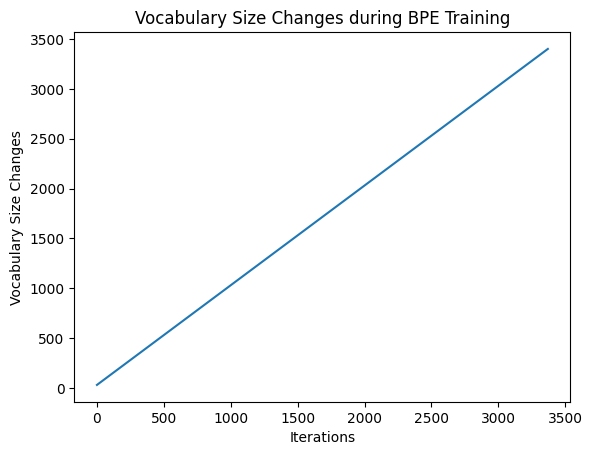

In [34]:
# Using the trained instances, priniting the vocab size changes
plt.plot(range(len(bpe.vocab_size_history)), bpe.vocab_size_history)
plt.title('Vocabulary Size Changes during BPE Training')
plt.xlabel('Iterations')
plt.ylabel('Vocabulary Size Changes')
plt.show()


## Report and further discussions

## Byte Pair Encoding (BPE)

Byte Pair Encoding (BPE) is a subword tokenization algorithm used in Natural Language Processing (NLP) to handle out-of-vocabulary words. In my implementation of the BPE algorithm, the following steps have been taken:

## Implementation Details

1. Initialization: The BPE class is initialized with the number of merges. It also initializes an empty dictionary for BPE codes, a list for vocabulary, and a set for the corpus.
2. Text Preprocessing and Cleaning: The preprocess method processes the input text, converting text to lowercase, removing any punctuation, and handling new lines.
3. Building BPE Codes: The build_bpe method processes the input text to build the BPE codes. It splits the text into words, then further into characters, creating an initial vocabulary with frequencies for each word.
4. Get Statistics: The get_stats method calculates the frequency of adjacent character pairs in the vocabulary.
5. Merge Vocabulary: The merge_vocabulary method merges the most frequent pair and updates the vocabulary.
6. Encoding Text: The encode method encodes input text using the learned BPE merges. It splits each word into characters and merges them based on the learned BPE codes. The process continues until no more pairs can be merged as per the BPE codes.

## Results

We observe that the vocabulary initially grows as individual characters are combined into common pairs. As the number of merges increases, the size of the vocabulary stabilizes, reflecting a balance between merging existing tokens and creating new ones.

## Strengths of BPE

1. BPE can handle unknown words by breaking them down into known subwords.
2. It is capable of adapting to language and corpus during the training process.
3. It balances word and character-level tokenization, providing effective performance.

## Weaknesses of BPE
1. The fixed number of merges in BPE does not work optimally in all cases.
2. BPE does not consider the context of the tokens or words, which can lead to lower performance in some cases.

## Challenges Faced During Implementation and Potential Recommendations

1. Determining the optimal number of merges can be time-consuming and involve much trial and error. A more dynamic approach to determining the number of merges could be adopted.
2. The training process was time-consuming, even though a limited number of books/texts were used for training. For future use cases, making the code more efficient or utilizing more computational resources could be beneficial.#